In [12]:
import pytesseract as pyt
import cv2
import matplotlib.pyplot as plt
from pytesseract import Output
import numpy as np

In [58]:
class Image:
    @staticmethod
    def show(img: np.ndarray):
        plt.figure(figsize=(15, 15))
        plt.imshow(img)
        plt.show()

    @staticmethod
    def invert(img: np.ndarray):
        return cv2.bitwise_not(img)

    @staticmethod
    def grayscale(img: np.ndarray):
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    @staticmethod
    def binary_img(img: np.ndarray):
        _, thr_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
        return thr_img

    @staticmethod
    def noise_removal(image: np.ndarray):
        kernel = np.ones((1, 1), np.uint8)
        image = cv2.dilate(image, kernel, iterations=1)
        kernel = np.ones((1, 1), np.uint8)
        image = cv2.erode(image, kernel, iterations=1)
        image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
        image = cv2.medianBlur(image, 3)
        return (image)

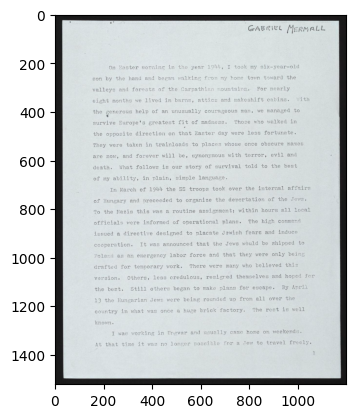

In [16]:
img = cv2.imread("../image/noisy_text.png")
# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img)
plt.show()

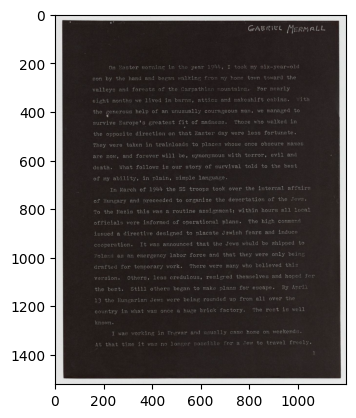

In [23]:
plt.imshow(Image.invert(img))
plt.show()

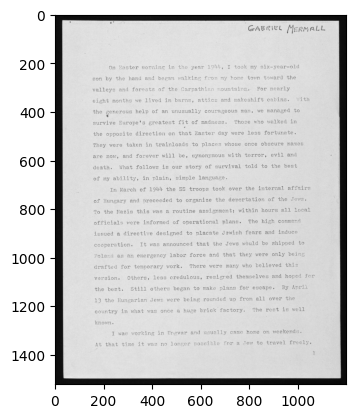

In [32]:
gray = Image.grayscale(img)
plt.imshow(gray, "gray")
plt.show()

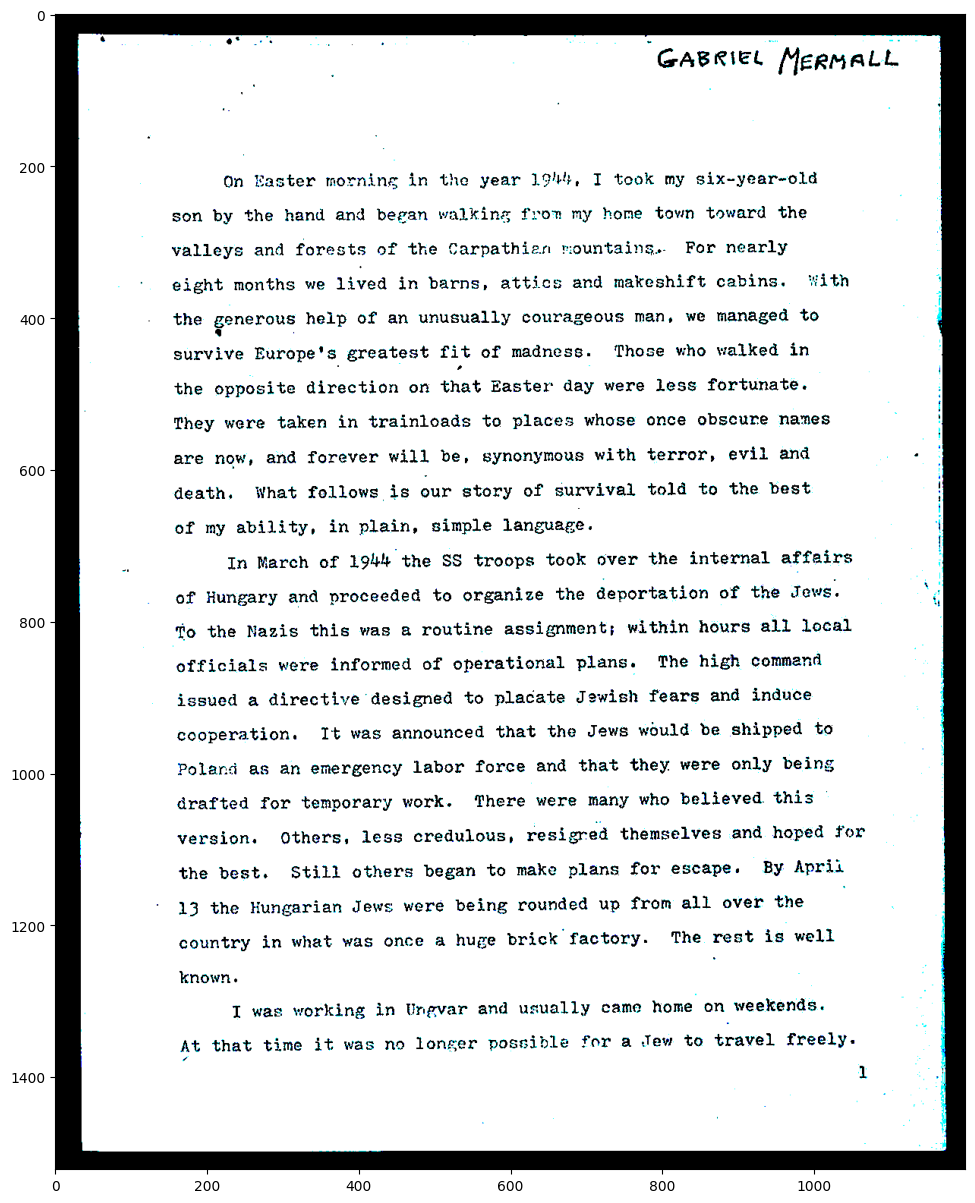

In [59]:
thr = Image.binary_img(img)
Image.show(thr)

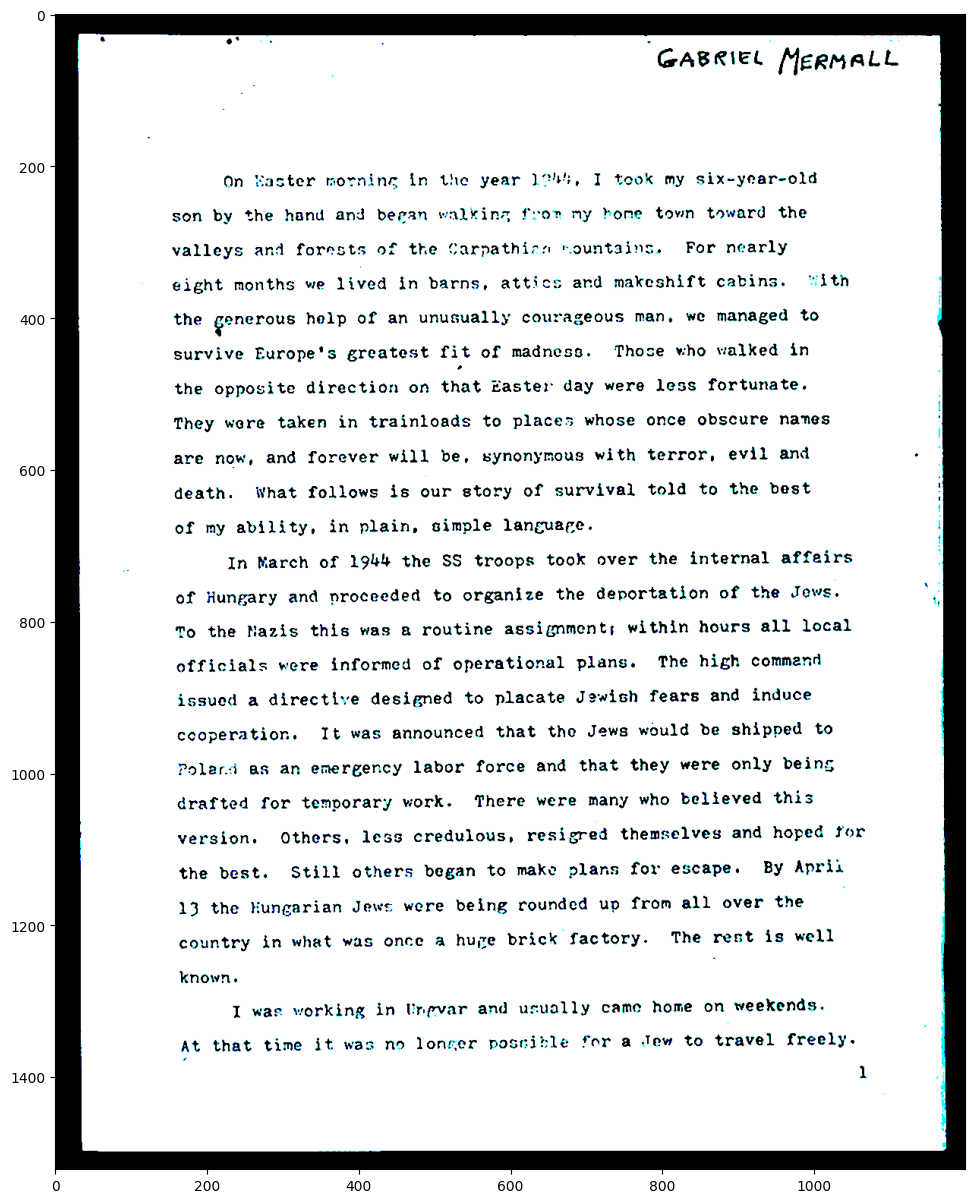

In [60]:
clean = Image.noise_removal(thr)
Image.show(clean)

In [4]:
height, width, _ = img.shape

In [5]:
pyt.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [6]:
ocr_result = pyt.image_to_string(img)

In [7]:
print(ocr_result)

In [8]:
with open("text_file.txt", "w+") as file:
    file.write(ocr_result)

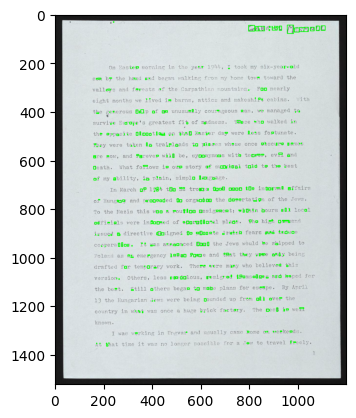

In [9]:
new_img = img.copy()
myconfiq = r"--psm 11 --oem 3"
boxes = pyt.image_to_boxes(img, config=myconfiq)
for box in boxes.splitlines():
    box = box.split()
    cv2.rectangle(
        new_img,
        (int(box[1]), height - int(box[2])),
        (int(box[3]), height - int(box[4])),
        (0, 255, 0),
        2
    )
    
plt.imshow(new_img)
plt.show()

In [10]:
box

['e', '788', '166', '797', '170', '0']

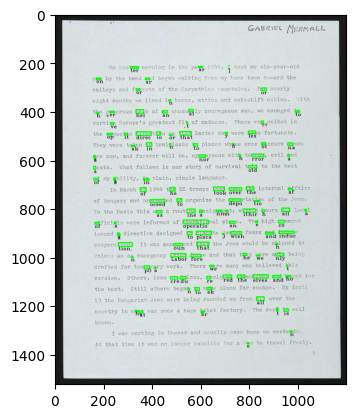

In [11]:
new_img = img.copy()
myconfiq = r"--psm 11 --oem 3"

data = pyt.image_to_data(new_img, config=myconfiq, output_type=Output.DICT)
amount_boxes = len(data["text"])
for i in range(amount_boxes):
    if float(data["conf"][i]) > 80:
        (x, y, width, height) = (
            data["left"][i],
            data["top"][i],
            data["width"][i],
            data["height"][i],
        )
        new_img = cv2.rectangle(
            new_img, (x, y), (x + width, y + height), (0, 255, 0), 3
        )
        new_img = cv2.putText(
            new_img,
            data["text"][i],
            (x, y + height + 15),
            cv2.FONT_HERSHEY_COMPLEX_SMALL,
            1,
            (0, 0, 0),
            1,
            cv2.LINE_AA,
        )

plt.imshow(new_img)
plt.show()

In [26]:
print(data.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [27]:
print(data["text"])

['', '', '', '', 'It', 'was', 'the', 'best', 'of', '', '', '', 'times,', 'it', 'was', 'the', 'worst', '', '', '', 'of', 'times,', 'it', 'was', 'the', 'age', '', '', '', 'of', 'wisdom,', 'it', 'was', 'the', '', '', '', 'age', 'of', 'foolishness...']


In [163]:
"""Usage:
  tesseract --help | --help-extra | --help-psm | --help-oem | --version
  tesseract --list-langs [--tessdata-dir PATH]
  tesseract --print-parameters [options...] [configfile...]
  tesseract imagename|imagelist|stdin outputbase|stdout [options...] [configfile...]
OCR options:
  --tessdata-dir PATH   Specify the location of tessdata path.
  --user-words PATH     Specify the location of user words file.
  --user-patterns PATH  Specify the location of user patterns file.
  -l LANG[+LANG]        Specify language(s) used for OCR.
  -c VAR=VALUE          Set value for config variables.
                        Multiple -c arguments are allowed.
  --psm NUM             Specify page segmentation mode.
  --oem NUM             Specify OCR Engine mode.
NOTE: These options must occur before any configfile.
Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.
OCR Engine modes: (see https://github.com/tesseract-ocr/tesseract/wiki#linux)
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.
Single options:
  -h, --help            Show minimal help message.
  --help-extra          Show extra help for advanced users.
  --help-psm            Show page segmentation modes.
  --help-oem            Show OCR Engine modes.
  -v, --version         Show version information.
  --list-langs          List available languages for tesseract engine.
  --print-parameters    Print tesseract parameters."""

'Usage:\n  tesseract --help | --help-extra | --help-psm | --help-oem | --version\n  tesseract --list-langs [--tessdata-dir PATH]\n  tesseract --print-parameters [options...] [configfile...]\n  tesseract imagename|imagelist|stdin outputbase|stdout [options...] [configfile...]\nOCR options:\n  --tessdata-dir PATH   Specify the location of tessdata path.\n  --user-words PATH     Specify the location of user words file.\n  --user-patterns PATH  Specify the location of user patterns file.\n  -l LANG[+LANG]        Specify language(s) used for OCR.\n  -c VAR=VALUE          Set value for config variables.\n                        Multiple -c arguments are allowed.\n  --psm NUM             Specify page segmentation mode.\n  --oem NUM             Specify OCR Engine mode.\nNOTE: These options must occur before any configfile.\nPage segmentation modes:\n  0    Orientation and script detection (OSD) only.\n  1    Automatic page segmentation with OSD.\n  2    Automatic page segmentation, but no OSD,